<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/cooking_eda_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 음
- kaggle 대회 : https://www.kaggle.com/competitions/whats-cooking-kernels-only/overview
- 데이터 시각화 참고 : https://www.kaggle.com/code/singh19dhananjay/what-s-cooking
- kaggle 코드 참고 : https://www.kaggle.com/code/ryzhokhina/what-s-cooking

### 사전 작업

In [ ]:
from google.colab import drive
drive.mount('/content/googledrive/')

Mounted at /content/googledrive/


In [ ]:
# 캐글 설치
!pip install kaggle

In [ ]:
# 코랩 한글패치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc

In [ ]:
# 한글패치
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 캐글 계정 연동
# !chmod 600 ./googledrive/MyDrive/응용/kaggle/kaggle.json

In [ ]:
# 데이터 다운
# !kaggle competitions download -c whats-cooking-kernels-only

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


### 데이터셋 불러오기 및 데이터 확인

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# json 파일 판다스로 읽기
path = './googledrive/MyDrive/응용/kaggle/cooking_yummly/data/train.json'
cook_df = pd.read_json(path)

In [ ]:
# 데이터 구조 확인
cook_df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
# 데이터 개수 및 컬럼 개수 확인
cook_df.shape

(39774, 3)

In [ ]:
# 데이터 정보확인
cook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [ ]:
# cuisine 컬럼 파해쳐보기
cook_df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [ ]:
# 각 고유값 누적 개수 확인
cook_df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

위 결과를 확인하면 분포가 불균형 하는것을 확인 할수있다.<br>
밑에서 시각화를 통해서 확인.

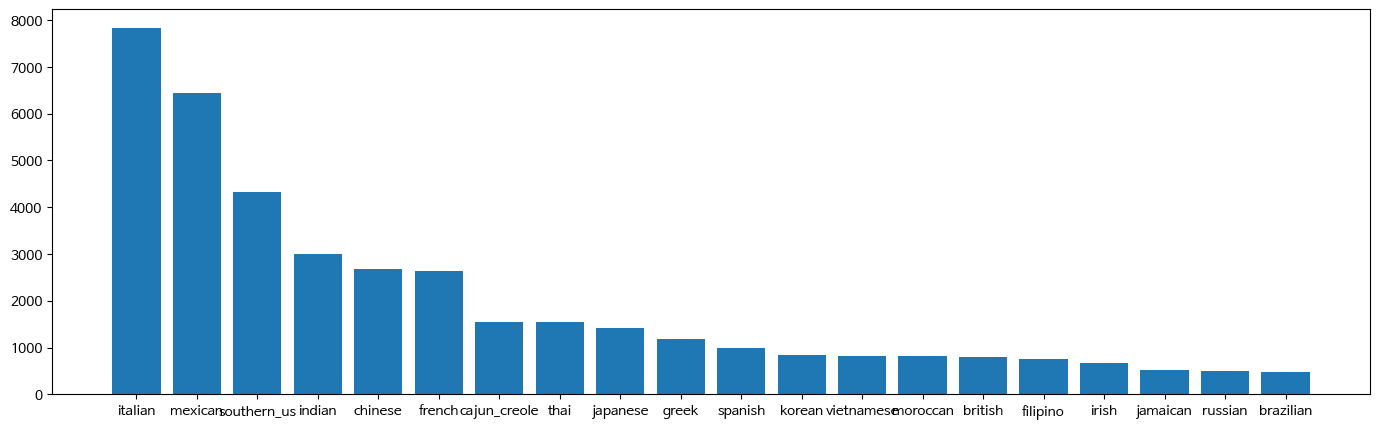

In [ ]:
# 분포도 확인
plt.figure(figsize=(17,5))
plt.bar(height=cook_df['cuisine'].value_counts(), x=cook_df['cuisine'].value_counts().index)
plt.xticks(cook_df['cuisine'].value_counts().index)
plt.show()

In [ ]:
# ingredients 열 문자열로 변경
cook_df['ingredients']

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [ ]:
cuisine = cook_df['cuisine'].unique()

In [ ]:
# 전체 재료 리스트
ingredient = []
for _ in cuisine:
  for a in cook_df[cook_df['cuisine'] == _]['ingredients']:
    for b in a:
      ingredient.append(b)

In [ ]:
# 위에서 만든 재료들 시리즈형태로 만들기
from pandas import Series
ingredient_serise = Series(ingredient)
ingredient_serise[:5]

0    romaine lettuce
1       black olives
2     grape tomatoes
3             garlic
4             pepper
dtype: object

In [ ]:
test = ingredient_serise.value_counts(sort=True).head(10)
test[:5]

salt         18049
olive oil     7972
onions        7972
water         7457
garlic        7380
dtype: int64

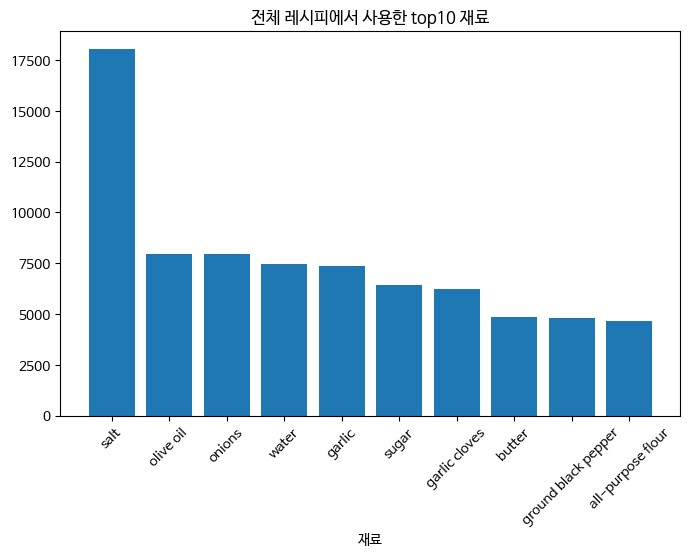

In [ ]:
# 전체 레시피에서 사용한 top10 재료
plt.figure(figsize=(8, 5))
plt.bar(x=test.index, height=test)

plt.xticks(rotation=45)
plt.title('전체 레시피에서 사용한 top10 재료')
plt.xlabel('재료')
plt.show()

In [ ]:
# 요리분류별 상위 5개 조회
cook_df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [ ]:
# 요리분류별 사용한 재료
cuisine_list = cook_df['cuisine'].value_counts().index
cuisine_list[:5]

Index(['italian', 'mexican', 'southern_us', 'indian', 'chinese'], dtype='object')

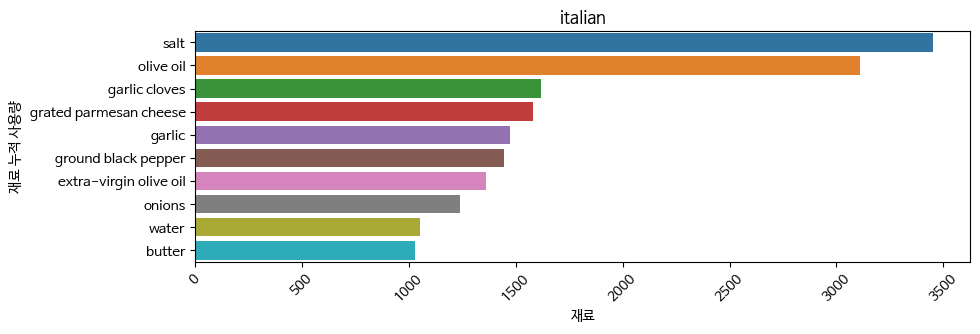

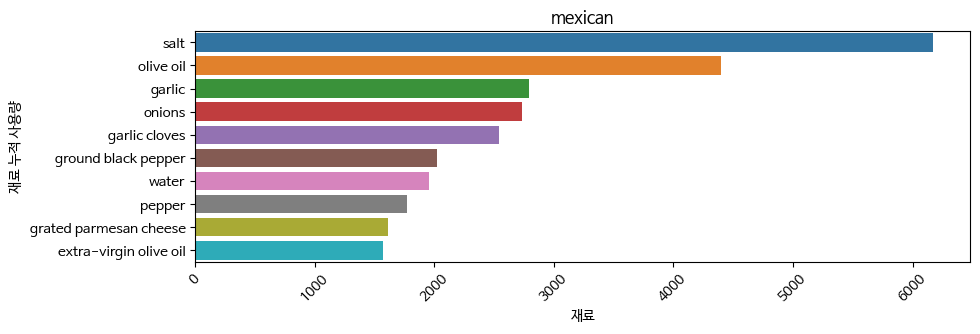

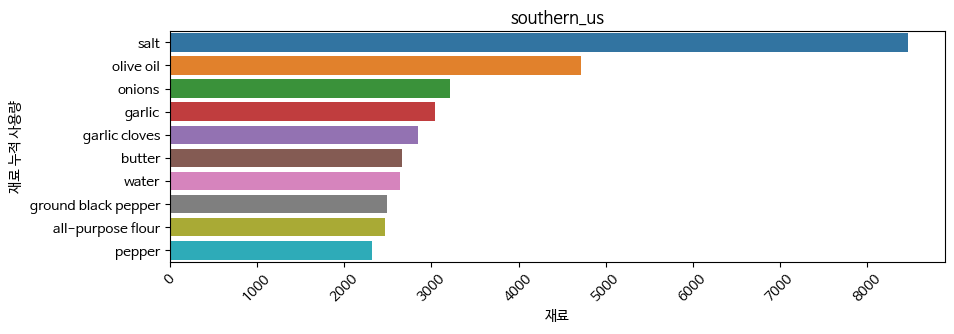

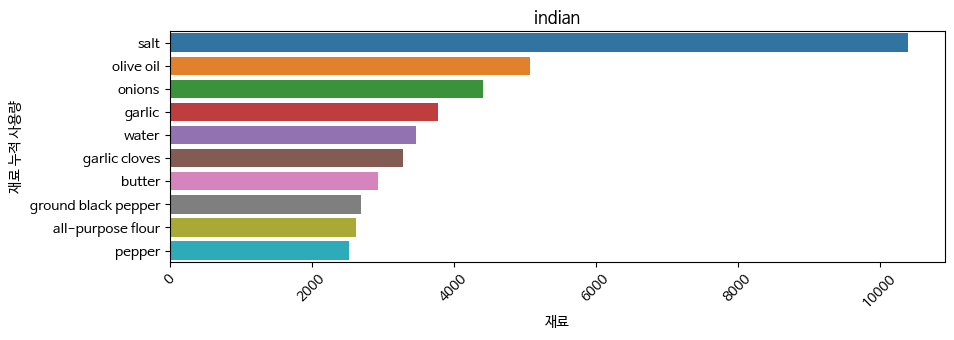

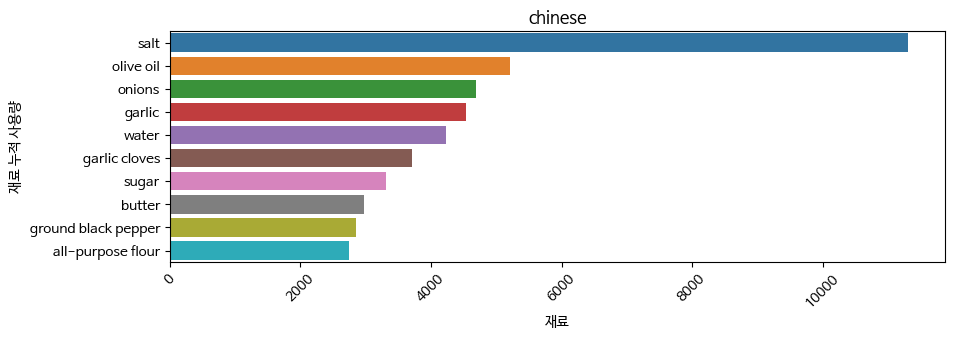

In [ ]:
import seaborn as sns
# top5 사용한 재료
ingredient_cuisine = []
for _ in cuisine_list[:5]:
  for i in cook_df[cook_df['cuisine'] == _ ]['ingredients']:
    for a in i:
      ingredient_cuisine.append(a)

  ics = pd.Series(ingredient_cuisine)
  ics_value = ics.value_counts(sort=True).head(10)

  plt.figure(figsize=(10, 3))
  sns.barplot(y=ics_value.index, x=ics_value)
  sns.color_palette("mako", as_cmap=True)

  # plt.xticks(rotation=45)
  plt.xlabel('재료')
  plt.ylabel('재료 누적 사용량')
  plt.title(_)
  plt.show()

### 자연어 학습전 데이터 전처리

#### 문자형 -> 숫자형으로 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
cook_df['cuisine_num'] = encoder.fit_transform(cook_df['cuisine'])

In [ ]:
cook_df.head()

,id,cuisine,ingredients,cuisine_num
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",6
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",16
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",4
3,22213,indian,"[water, vegetable oil, wheat, salt]",7
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",7


#### ingredients 리스트형 데이터 -> 문자(소문자로)형 변환

In [ ]:
txt = []
for _ in cook_df['ingredients']:
  txt.append(' '.join(_).lower())

In [ ]:
cook_df['ingredients_txt'] = txt

In [ ]:
cook_df

,id,cuisine,ingredients,cuisine_num,ingredients_txt
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",6,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",16,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",4,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",7,water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",7,black pepper shallots cornflour cayenne pepper...
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",8,light brown sugar granulated sugar butter warm...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",9,kraft zesty italian dressing purple onion broc...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",8,eggs citrus fruit raisins sourdough starter fl...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",3,boneless chicken skinless thigh minced garlic ...
